In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_16 = pd.read_csv('./mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv')

In [3]:
df_16.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
df_check = df_16

In [5]:
df_check.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [6]:
df_check.isnull().sum(axis=0)

Are you self-employed?                                                                                                                                                                 0
How many employees does your company or organization have?                                                                                                                           287
Is your employer primarily a tech company/organization?                                                                                                                              287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employe

In [7]:
## All the columns are long questions... needs to be renamed.
df_check.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [8]:
df_check.rename(columns={

#Job
        'Are you self-employed?': 'selfemployed',
       'How many employees does your company or organization have?': 'num_employees',
       'Is your employer primarily a tech company/organization?': 'tech_employer',
       'Is your primary role within your company related to tech/IT?': 'tech_role', ### Note: string

#Work+MH
       'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits', #
       'Do you know the options for mental health care available under your employer-provided coverage?': 'know_benefits', #
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'disc_mh',#
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'mh_edu',#
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anon', #
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'ease_askleave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'disc_mhstigma', #
       'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'disc_phstigma',#
       'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'disc_coworkers', #
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'disc_superv', #
       'Do you feel that your employer takes mental health as seriously as physical health?': 'employer_mhph',    #
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'obs_coworkers', #
        "Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?": 'mh_coverage',
#Reveal
       'Do you know local or online resources to seek help for a mental health disorder?': 'know_other_resources',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_clients',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'reveal_clients_impact',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_work',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'reveal_work_impact',

#Productivity ---- DECISION TREE
       'Do you believe your productivity is ever affected by a mental health issue?': 'pdy',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'pdy_pct',

#Previous Employers 'prv' ## 11 or the 11 are asked in regards to current employer
       'Do you have previous employers?' : 'prv_emp',
       'Have your previous employers provided mental health benefits?' : 'prv_benefits',
       'Were you aware of the options for mental health care provided by your previous employers?' : 'prv_know_benefits',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'prv_disc_mh',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'prv_mh_edu' ,
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'prv_anon',            
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'prv_disc_mhstigma',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'prv_disc_phstigma',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'prv_disc_coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'prv_disc_superv',
       'Did you feel that your previous employers took mental health as seriously as physical health?': 'prv_employer_mhph',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'prv_obs_coworkers',

#MH and Sharing
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'ph_int',
       'Why or why not?': 'ph_int_why',
       'Would you bring up a mental health issue with a potential employer in an interview?': 'mh_int',
       'Why or why not?.1': 'mh_int_why',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'mh_hurt_career',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'team_mhstigma',
       'How willing would you be to share with friends and family that you have a mental illness?': 'share',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' : 'obs_bad_rxn',       
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'rxn_coworker',

#History
       'Do you have a family history of mental illness?': 'mh_fam_history',                   
       'Have you had a mental health disorder in the past?': 'mh_history',

#MH Disorder --- DECISION TREE
       'Do you currently have a mental health disorder?': 'mhnow',      
       'If yes, what condition(s) have you been diagnosed with?': 'mhnow_cond',
       'If maybe, what condition(s) do you believe you have?': 'mhnow_selfdiag',

#MH Professional Diagnosis --- DECISION TREE
       'Have you been diagnosed with a mental health condition by a medical professional?': 'diag',
       'If so, what condition(s) were you diagnosed with?': 'diag_cond',
    
#Treatment
       'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treat',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : 'treat_effective',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'treat_noteffective',

#Work/Demographics
        'What is your age?': 'age',
        'What is your gender?': 'gender',
       'What country do you live in?': 'country',
       'What US state or territory do you live in?': 'state',
       'What country do you work in?': 'country_work',
       'What US state or territory do you work in?': 'state_work',
       'Which of the following best describes your work position?': 'work',
       'Do you work remotely?': 'remote'}, inplace=True)

In [9]:
df_check.columns

Index(['selfemployed', 'num_employees', 'tech_employer', 'tech_role',
       'benefits', 'know_benefits', 'disc_mh', 'mh_edu', 'anon',
       'ease_askleave', 'disc_mhstigma', 'disc_phstigma', 'disc_coworkers',
       'disc_superv', 'employer_mhph', 'obs_coworkers',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'know_other_resources', 'reveal_clients', 'reveal_clients_impact',
       'reveal_work', 'reveal_work_impact', 'pdy', 'pdy_pct', 'prv_emp',
       'prv_benefits', 'prv_know_benefits', 'prv_disc_mh', 'prv_mh_edu',
       'prv_anon', 'prv_disc_mhstigma', 'prv_disc_phstigma',
       'prv_disc_coworkers', 'prv_disc_superv', 'prv_employer_mhph',
       'prv_obs_coworkers', 'ph_int', 'ph_int_why', 'mh_int', 'mh_int_why',
       'mh_hurt_career', 'team_mhstigma', 'share', 'obs_bad_rxn',
       'rxn_coworker', 'mh_fam_history', 'mh_history', 'mhnow', 'mhnow_cond',
       'mhnow_selfdiag', 'diag', 'd

In [10]:
#My attempt to Rename Variable 'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?'
df_check.rename(columns={'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'mh_coverage'}, inplace=True)

In [11]:
df_check.columns
# not working... revisit for later

Index(['selfemployed', 'num_employees', 'tech_employer', 'tech_role',
       'benefits', 'know_benefits', 'disc_mh', 'mh_edu', 'anon',
       'ease_askleave', 'disc_mhstigma', 'disc_phstigma', 'disc_coworkers',
       'disc_superv', 'employer_mhph', 'obs_coworkers',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'know_other_resources', 'reveal_clients', 'reveal_clients_impact',
       'reveal_work', 'reveal_work_impact', 'pdy', 'pdy_pct', 'prv_emp',
       'prv_benefits', 'prv_know_benefits', 'prv_disc_mh', 'prv_mh_edu',
       'prv_anon', 'prv_disc_mhstigma', 'prv_disc_phstigma',
       'prv_disc_coworkers', 'prv_disc_superv', 'prv_employer_mhph',
       'prv_obs_coworkers', 'ph_int', 'ph_int_why', 'mh_int', 'mh_int_why',
       'mh_hurt_career', 'team_mhstigma', 'share', 'obs_bad_rxn',
       'rxn_coworker', 'mh_fam_history', 'mh_history', 'mhnow', 'mhnow_cond',
       'mhnow_selfdiag', 'diag', 'd

In [12]:
df = df_check

In [13]:
df.dtypes

selfemployed                                                                                                               int64
num_employees                                                                                                             object
tech_employer                                                                                                            float64
tech_role                                                                                                                float64
benefits                                                                                                                  object
know_benefits                                                                                                             object
disc_mh                                                                                                                   object
mh_edu                                                                                           

In [14]:
df.describe()

,selfemployed,tech_employer,tech_role,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,prv_emp,treat,age
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [15]:
# df.isnull()

In [16]:
## Pivot Tables for Later
# from pivottablejs import pivot_ui
# pivot_ui(df)

In [17]:
df.head()

,selfemployed,num_employees,tech_employer,tech_role,benefits,know_benefits,disc_mh,mh_edu,anon,ease_askleave,...,treat_effective,treat_noteffective,age,gender,country,state,country_work,state_work,work,remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


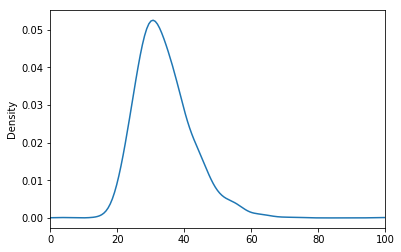

In [18]:
df.age.plot(kind='density', xlim=(0,100));

In [19]:
df.selfemployed.value_counts()
# 0 is selfemployed
# 1 is not selfemployed

0    1146
1     287
Name: selfemployed, dtype: int64

In [20]:
df.tech_employer.value_counts()
# 0: not
# 1: employer is primarily a tech company

1.0    883
0.0    263
Name: tech_employer, dtype: int64

In [21]:
#Number of Employees:
##Did this earlier:
## df['num_employees'] = df['num_employees'].replace(
###  {'1-5':1, '6-25':2, '26-100': 3, '100-500':4, '500-1000':5, 'More than 1000':6})

df.num_employees.value_counts()

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: num_employees, dtype: int64

In [22]:
df.benefits.value_counts()

Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: benefits, dtype: int64

In [23]:
df['n_benefits'] = df['benefits'].replace({'Yes': 2, 'No': 0, "I don't know":1, 'Not eligible for coverage / N/A': np.nan})
df.benefits.value_counts()

Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: benefits, dtype: int64

In [24]:
df.know_benefits.value_counts()

No               354
I am not sure    352
Yes              307
Name: know_benefits, dtype: int64

In [25]:
df['know_benefits'] = df['know_benefits'].replace({'Yes': 2, 'No': 0, "I am not sure":1})
df.know_benefits.value_counts()

0.0    354
1.0    352
2.0    307
Name: know_benefits, dtype: int64

In [26]:
# GENDER
df.gender.describe()

count     1430
unique      70
top       Male
freq       610
Name: gender, dtype: object

In [27]:
df.gender.value_counts()

Male                                       610
male                                       249
Female                                     153
female                                      95
M                                           86
m                                           79
F                                           38
f                                           23
Male                                        11
Female                                       9
woman                                        4
non-binary                                   4
Woman                                        3
man                                          3
female                                       3
Male (cis)                                   2
male                                         2
Nonbinary                                    2
Agender                                      2
Man                                          2
fem                                          1
Human        

In [28]:
df['gender'] = df['gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['gender'] = df['gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['gender'] = df['gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

In [29]:
df.gender.unique()

array(['Male', 'Female', 'Genderqueer/Other', nan], dtype=object)

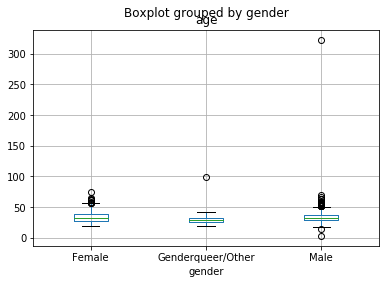

In [30]:
df.boxplot(column='age', by='gender')

In [31]:
df.age.describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

In [32]:
## Finding all the Values in 'Previous Employer' variables

print(df.prv_emp.value_counts(),# 1: Yes, 0:No
'\n','\n', df.prv_benefits.value_counts(), # 'No, none did':0, 'Some did':1, 'Yes, they all did':2 ,"I don't know": np.nan
'\n','\n',df.prv_know_benefits.value_counts(), # "No, I only became aware later":0, "I was aware of some":1, "Yes, I was aware of all of them":2, "N/A (not currently aware)": np.nan
'\n','\n', df.prv_disc_mh.value_counts(), # "None did":0, "Some did":1, "Yes, they all did":2, "I don't know": np.nan
'\n','\n', df.prv_mh_edu.value_counts(), # "None did":0, "Some did":1, "Yes, they all did":2
'\n','\n', df.prv_anon.value_counts(), # "No":0, "Sometimes":1, "Yes, always":2, "I don't know": np.nan
'\n','\n', df.prv_disc_mhstigma.value_counts(), # "None of them":0, "Some of them":1, "Yes, all of them ":2 "I don't know": np.nan
'\n','\n', df.prv_disc_phstigma.value_counts(), # "None of them":0, "Some of them":1, "Yes, all of them ":2
'\n','\n', df.prv_disc_coworkers.value_counts(), # "No, at none of my previous employers":0, "Some of my previous employers":1, "Yes, at all of my previous employers":2
'\n','\n', df.prv_disc_superv.value_counts(), # "No, at none of my previous employers":0, "Some of my previous employers":1, "Yes, at all of my previous employers":2, "I don't know": np.nan
'\n','\n', df.prv_employer_mhph.value_counts(), # "None did":0, "Some did":1, "Yes, they all did":2, "I don't know": np.nan
'\n','\n', df.prv_obs_coworkers.value_counts()) # "None of them":0, "Some of them":1, "Yes, all of them":2

1    1264
0     169
Name: prv_emp, dtype: int64 
 
 Some did             391
No, none did         372
I don't know         313
Yes, they all did    188
Name: prv_benefits, dtype: int64 
 
 N/A (not currently aware)          582
I was aware of some                384
Yes, I was aware of all of them    181
No, I only became aware later      117
Name: prv_know_benefits, dtype: int64 
 
 None did             890
Some did             255
I don't know          86
Yes, they all did     33
Name: prv_disc_mh, dtype: int64 
 
 None did             842
Some did             371
Yes, they all did     51
Name: prv_mh_edu, dtype: int64 
 
 I don't know    860
Yes, always     164
No              121
Sometimes       119
Name: prv_anon, dtype: int64 
 
 Some of them        615
I don't know        310
Yes, all of them    226
None of them        113
Name: prv_disc_mhstigma, dtype: int64 
 
 Some of them        631
None of them        559
Yes, all of them     74
Name: prv_disc_phstigma, dtype: int64 
 
 So

In [33]:
#Renaming 
## df['n_'] = df[''].replace({})

#Note: prv_emp is already 1/0 binary 1: Yes, 0:No --- going to make a new series

df['n_prv_emp'] = df['prv_emp']
df['n_prv_benefits'] = df['prv_benefits'].replace({'No, none did':0, 'Some did':1, 'Yes, they all did':2 ,"I don't know": np.nan})
df['n_prv_know_benefits'] = df['prv_know_benefits'].replace({"No, I only became aware later":0, "I was aware of some":1, "Yes, I was aware of all of them":2, "N/A (not currently aware)": np.nan})
df['n_prv_disc_mh'] = df['prv_disc_mh'].replace({"None did":0, "Some did":1, "Yes, they all did":2, "I don't know": np.nan})
df['n_prv_mh_edu'] = df['prv_mh_edu'].replace({"None did":0, "Some did":1, "Yes, they all did":2})
df['n_prv_anon'] = df['prv_anon'].replace({"No":0, "Sometimes":1, "Yes, always":2, "I don't know": np.nan})
df['n_prv_disc_mhstigma'] = df['prv_disc_mhstigma'].replace({"None of them":0, "Some of them":1, "Yes, all of them ":2, "I don't know": np.nan})
df['n_prv_disc_phstigma'] = df['prv_disc_phstigma'].replace({"None of them":0, "Some of them":1, "Yes, all of them ":2})
df['n_prv_disc_coworkers'] = df['prv_disc_coworkers'].replace({"No, at none of my previous employers":0, "Some of my previous employers":1, "Yes, at all of my previous employers":2})
df['n_prv_disc_superv'] = df['prv_disc_superv'].replace({"No, at none of my previous employers":0, "Some of my previous employers":1, "Yes, at all of my previous employers":2, "I don't know": np.nan})
df['n_prv_employer_mhph'] = df['prv_employer_mhph'].replace({"None did":0, "Some did":1, "Yes, they all did":2, "I don't know": np.nan})
df['n_prv_obs_coworkers'] = df['prv_obs_coworkers'].replace({"None of them":0, "Some of them":1, "Yes, all of them":2})



In [34]:
df.shape

(1433, 76)

In [35]:
#Checking to see new variables and their conversion
df.iloc[0:1,63:74]

,n_benefits,n_prv_emp,n_prv_benefits,n_prv_know_benefits,n_prv_disc_mh,n_prv_mh_edu,n_prv_anon,n_prv_disc_mhstigma,n_prv_disc_phstigma,n_prv_disc_coworkers,n_prv_disc_superv
0,NaN,1,0.0,NaN,NaN,0.0,NaN,1,0,1.0,1.0
